In [129]:
import numpy as np
import matplotlib.pyplot as plt


In [130]:
from scipy.spatial import ConvexHull

In [131]:
points = np.random.rand(60, 2)   # 30 random points in 2-D
hull = ConvexHull(points)

In [132]:
%run helper.ipynb

In [133]:
indecies = hull.vertices.tolist()

In [134]:
hull_verticies = [tuple(points[i]) for i in indecies]

In [135]:
def find_diameter(verticies):
    fix_index = 0
    edgeA, edgeB = verticies[-1], verticies[fix_index]
    start = 0
    d = 0
    end = 0
    for i in range(1, len(verticies)-1):        
        newd = where_is_dot(verticies[i], edgeA, edgeB)
        if newd > d:
            d = newd
            start = i
        else:
            break
    end = start
    edgeA = edgeB
    fix_index += 1
    edgeB = verticies[fix_index]
    endd = where_is_dot(verticies[start], edgeA, edgeB)
    for i in range(start, len(verticies)-1):
        calcd = where_is_dot(verticies[i], edgeA, edgeB)
        if endd > calcd:
            end = i
            break
    return (verticies[start], verticies[end])

In [136]:
vs, ve = find_diameter(hull_verticies)

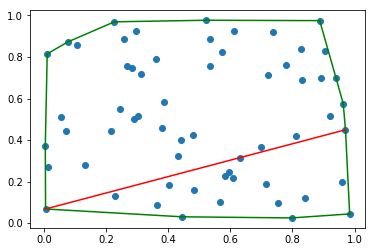

In [137]:
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'g')
plt.plot((vs[0], ve[0]), (vs[1], ve[1]), 'r')